# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## imports for Python, Pandas

In [19]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [20]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [21]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [22]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [23]:
# load json as string
json.load((open('world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [24]:
# load as Pandas dataframe
sample_json_df = pd.read_json('world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## <font color='blue'> Problem 1 </font>

### 1. Find the 10 countries with most projects


In [68]:
# load as Pandas dataframe
wb_df = pd.read_json('world_bank_projects.json')
wb_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [69]:
# View the columns values 
list(wb_df.columns.values)

['_id',
 'approvalfy',
 'board_approval_month',
 'boardapprovaldate',
 'borrower',
 'closingdate',
 'country_namecode',
 'countrycode',
 'countryname',
 'countryshortname',
 'docty',
 'envassesmentcategorycode',
 'grantamt',
 'ibrdcommamt',
 'id',
 'idacommamt',
 'impagency',
 'lendinginstr',
 'lendinginstrtype',
 'lendprojectcost',
 'majorsector_percent',
 'mjsector_namecode',
 'mjtheme',
 'mjtheme_namecode',
 'mjthemecode',
 'prodline',
 'prodlinetext',
 'productlinetype',
 'project_abstract',
 'project_name',
 'projectdocs',
 'projectfinancialtype',
 'projectstatusdisplay',
 'regionname',
 'sector',
 'sector1',
 'sector2',
 'sector3',
 'sector4',
 'sector_namecode',
 'sectorcode',
 'source',
 'status',
 'supplementprojectflg',
 'theme1',
 'theme_namecode',
 'themecode',
 'totalamt',
 'totalcommamt',
 'url']

In [70]:
# Check out values in project_name column
wb_df['project_name'].head()

0    Ethiopia General Education Quality Improvement...
1            TN: DTF Social Protection Reforms Support
2    Tuvalu Aviation Investment Project - Additiona...
3     Gov't and Civil Society Organization Partnership
4    Second Private Sector Competitiveness and Econ...
Name: project_name, dtype: object

In [71]:
# Use groupby on countryname 
country_names = wb_df.groupby('countryname')

In [72]:
# Use size to get the number of elements in project_name and sort 
country_projects = country_names['project_name'].size().sort_values(ascending=False)

In [73]:
country_projects = country_projects[0:10]

In [74]:
country_projects

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

## Answer #1: 

         countryname                   country_projects
1. People's Republic of China ----------------- 19
2. Republic of Indonesia ---------------------- 19
3. Socialist Republic of Vietnam -------------- 17
4. Republic of India -------------------------- 16
5. Republic of Yemen -------------------------- 13
6. Nepal -------------------------------------- 12
7. People's Republic of Bangladesh ------------ 12
8. Kingdom of Morocco ------------------------- 12
9. Africa ------------------------------------- 11
10. Republic of Mozambique -------------------- 11

## <font color = 'blue'> Problem 2 </font>

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [75]:
# Check out mjtheme_namecode

wb_df['mjtheme_namecode'][1]

[{'code': '1', 'name': 'Economic management'},
 {'code': '6', 'name': 'Social protection and risk management'}]

In [76]:
# Create a DataFrame to store the code and name 
project_theme = pd.DataFrame(columns=['code', 'name'])
project_theme

,code,name


In [77]:
# Convert mjtheme_namecode to a list of DataFrames using json_normalize 
for row in wb_df['mjtheme_namecode']:
    project_theme = project_theme.append(json_normalize(row))
project_theme.reset_index(drop=True, inplace=True)


In [78]:
# Some projects are missing names
project_theme['name'].value_counts().head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [79]:
# Sort by code as some name values are missing. 
project_theme['code'].value_counts().head(10)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

## Answer 2 

**By Name:** 

1. Environment and natural resources management    223
2. Rural development                               202
3. Human development                               197
4. Public sector governance                        184
5. Social protection and risk management           158
6. Financial and private sector development        130
7.                                                 122
8. Social dev/gender/inclusion                     119
9. Trade and integration                            72
10. Urban development                                47


**By Code:** 

- 11 --> 250
- 10 --> 216
- 8  --> 210
- 2  --> 199
- 6  --> 168
- 4  --> 146
- 7  --> 130
- 5  -->  77
- 9  -->  50
- 1  -->  38


## <font color = 'blue'> Problem 3 </font>

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [80]:
project_theme.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [82]:
# Make a reference table ref_table{code: name} for easy lookup
ref_table = {}

for row in project_theme.itertuples():
    if row[2] != '':
        ref_table[row[1]] = row[2]
ref_table

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [83]:
# Iterate project_theme and fill names corresponding to code using ref_table 
for row in project_theme.itertuples():
    if row[2] == '':
        project_theme.at[row[0], 'name'] = ref_table[row[1]]


In [98]:
# List the top 10 projects theme by name 
project_theme.name.value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64

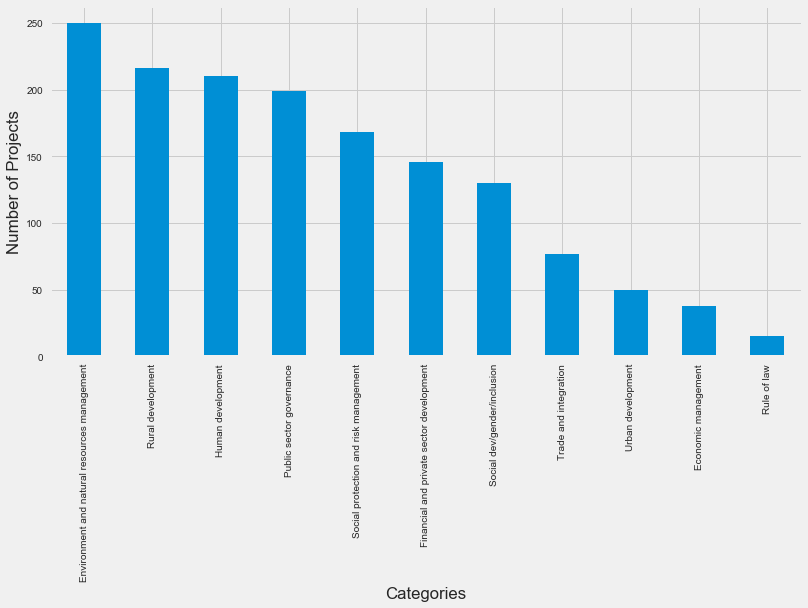

In [97]:
# Visualize the results
fig_result = project_theme.name.value_counts()
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.xlabel('Categories')
plt.ylabel('Number of Projects')
fig_result.plot(kind='bar')